In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics as stat
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/content/train (1).csv')

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.shape

(8693, 14)

HANDLE MISSING VALUES

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


Filling missing values for numerical data

'Age'

In [ ]:
imputer = SimpleImputer(strategy='mean')
imp_age = imputer.fit_transform(df['Age'].values.reshape(-1,1))
# new_age = pd.DataFrame(imp_age, columns=df.columns)
df['Age']=imp_age

In [ ]:
df['Age'].isna().sum()

0

'RoomService'

In [ ]:
imputer = SimpleImputer(strategy='mean')
imp_room_service = imputer.fit_transform(df['RoomService'].values.reshape(-1,1))
df['RoomService'] = imp_room_service

In [ ]:
df['RoomService'].isna().sum()

0

'FoodCourt',  'ShoppingMall',  'Spa',  'VRDeck'

In [ ]:
df['FoodCourt'] = df['FoodCourt'].fillna(0)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
df['Spa'] = df['Spa'].fillna(0)
df['VRDeck'] = df['VRDeck'].fillna(0)

In [ ]:
categorical_columns = df.select_dtypes(exclude=['number'])
categorical_columns

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,False


Encoding categorical variables

'HomePlanet' , 'Destination'

In [ ]:
df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
df['HomePlanet'].isnull().sum()

0

'Cabin'

In [ ]:
df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df['Cabin'].str.split('/', expand=True, n=2)
df = df.drop(columns = ['PassengerId','Name','Cabin'])

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [ ]:
df['Cabin_Deck'] = df['Cabin_Deck'].fillna(df['Cabin_Deck'].mode()[0])
df['Cabin_Num'] = df['Cabin_Deck'].fillna(df['Cabin_Deck'].mode()[0])
df['Cabin_Side'] = df['Cabin_Deck'].fillna(df['Cabin_Deck'].mode()[0])

In [ ]:
df['VIP'] = df['VIP'].fillna(0)
df['CryoSleep'] = df['CryoSleep'].fillna(0)
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['CryoSleep'].astype(int)
df['Transported'] = df['Transported'].astype(int)

In [ ]:
df.select_dtypes(exclude='number')

,HomePlanet,Destination,Cabin_Deck,Cabin_Num,Cabin_Side
0,Europa,TRAPPIST-1e,B,B,B
1,Earth,TRAPPIST-1e,F,F,F
2,Europa,TRAPPIST-1e,A,A,A
3,Europa,TRAPPIST-1e,A,A,A
4,Earth,TRAPPIST-1e,F,F,F
...,...,...,...,...,...
8688,Europa,55 Cancri e,A,A,A
8689,Earth,PSO J318.5-22,G,G,G
8690,Earth,TRAPPIST-1e,G,G,G
8691,Europa,55 Cancri e,E,E,E


In [ ]:
df['Destination'].unique()
df['Destination'] = df['Destination'].map({'TRAPPIST-1e':1, 'PSO J318.5-22':2, '55 Cancri e':3 })

In [ ]:
df['HomePlanet'].unique()
df['HomePlanet'] = df['HomePlanet'].map({'Europa':1, 'Earth':2, 'Mars':3 })

In [ ]:
df['Cabin_Deck'].unique()
df['Cabin_Deck'] = df['Cabin_Deck'].map({'B':1, 'F':2, 'A':3, 'G':4, 'E':5, 'D':6, 'C':7, 'T':8})

In [ ]:
df['Cabin_Num'].unique()
df['Cabin_Num'] = df['Cabin_Num'].map({'B':1, 'F':2, 'A':3, 'G':4, 'E':5, 'D':6, 'C':7, 'T':8})

In [ ]:
df['Cabin_Side'].unique()
df['Cabin_Side'] = df['Cabin_Side'].map({'B':1, 'F':2, 'A':3, 'G':4, 'E':5, 'D':6, 'C':7, 'T':8})

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,1,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,1
1,2,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,2,2,2
2,1,0,1,58.0,0,43.0,3576.0,0.0,6715.0,49.0,0,3,3,3
3,1,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,3,3,3
4,2,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1,2,2,2


In [ ]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'],
      dtype='object')

Handling duplicates

In [ ]:
df = df.drop_duplicates()
df.duplicated().value_counts()

False    6360
dtype: int64

# Bivariate Analysis

Pearson's Correlation (p-value)

In [ ]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'],
      dtype='object')

In [ ]:
df.corr()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
HomePlanet,1.000000,-0.071813,-0.206925,-0.113686,-0.071813,0.238173,-0.364348,0.103238,-0.261623,-0.291387,-0.144714,-0.141593,-0.141593,-0.141593
CryoSleep,-0.071813,1.000000,0.144626,0.027956,1.000000,-0.170458,-0.146569,-0.147940,-0.140992,-0.136916,0.352376,0.075661,0.075661,0.075661
Destination,-0.206925,0.144626,1.000000,-0.010674,0.144626,-0.055503,0.130867,-0.029437,0.065588,0.086140,0.109836,0.020581,0.020581,0.020581
Age,-0.113686,0.027956,-0.010674,1.000000,0.027956,0.015560,0.101760,-0.016491,0.095948,0.070653,0.000278,0.067334,0.067334,0.067334
VIP,-0.071813,1.000000,0.144626,0.027956,1.000000,-0.170458,-0.146569,-0.147940,-0.140992,-0.136916,0.352376,0.075661,0.075661,0.075661
RoomService,0.238173,-0.170458,-0.055503,0.015560,-0.170458,1.000000,-0.052271,0.017814,-0.025047,-0.052994,-0.203259,0.026116,0.026116,0.026116
FoodCourt,-0.364348,-0.146569,0.130867,0.101760,-0.146569,-0.052271,1.000000,-0.044243,0.199129,0.202975,0.131519,0.120834,0.120834,0.120834
ShoppingMall,0.103238,-0.147940,-0.029437,-0.016491,-0.147940,0.017814,-0.044243,1.000000,-0.014004,-0.036201,0.088260,-0.014475,-0.014475,-0.014475
Spa,-0.261623,-0.140992,0.065588,0.095948,-0.140992,-0.025047,0.199129,-0.014004,1.000000,0.124809,-0.192007,0.076885,0.076885,0.076885
VRDeck,-0.291387,-0.136916,0.086140,0.070653,-0.136916,-0.052994,0.202975,-0.036201,0.124809,1.000000,-0.177342,0.088917,0.088917,0.088917


In [ ]:
df['Transported'].corr(df['Age'])

0.0002784120846986257

In [ ]:
r, p = stats.pearsonr(df['Age'],df['Transported'])
print('Pearson Coefficient: ',r)
print('P-value: ',round(p,4))

Pearson Coefficient:  0.00027841208469864606
P-value:  0.9823


In [ ]:
corr_data = pd.DataFrame(columns=['r','p'])
for col in df.columns:
  r, p = stats.pearsonr(df['Transported'],df[col])
  corr_data.loc[col]=[round(r,3),round(p,3)]

print(corr_data)

                  r      p
HomePlanet   -0.145  0.000
CryoSleep     0.352  0.000
Destination   0.110  0.000
Age           0.000  0.982
VIP           0.352  0.000
RoomService  -0.203  0.000
FoodCourt     0.132  0.000
ShoppingMall  0.088  0.000
Spa          -0.192  0.000
VRDeck       -0.177  0.000
Transported   1.000  0.000
Cabin_Deck    0.054  0.000
Cabin_Num     0.054  0.000
Cabin_Side    0.054  0.000


Text(0, 0.5, 'Transported')

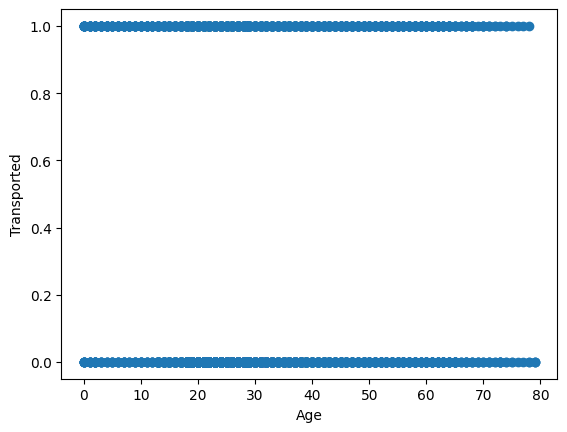

In [ ]:
plt.scatter(df['Age'],df['Transported'])
plt.xlabel('Age')
plt.ylabel('Transported')

In [ ]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,1,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,1
1,2,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,2,2,2
2,1,0,1,58.0,0,43.0,3576.0,0.0,6715.0,49.0,0,3,3,3
3,1,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,3,3,3
4,2,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1,2,2,2


In [ ]:
feature = 'smoker'
label = 'charges'
groups = df[feature].unique()
grouped_values = []
for group in groups:
  grouped_values.append(df[df[feature]==group][label])
grouped_values


In [ ]:
trans_y = df[df['Transported']==1]['Age']
# trans_y['Age']
# trans_y['Age']

In [ ]:
trans_y.shape

(2494,)

In [ ]:
X = df.drop('Transported', axis=1)
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7783018867924528
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       768
           1       0.74      0.67      0.71       504

    accuracy                           0.78      1272
   macro avg       0.77      0.76      0.76      1272
weighted avg       0.78      0.78      0.78      1272



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
